# Exercise 05


## Using the example_retail_sales dataset:
- Standarize the dataset using np.log
- Using prophet forescast the next 6 months of the sales logarithm
- Predict the next 6 months of sales

In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Ser = pd.read_csv('example_retail_sales.csv',header=0, parse_dates=[0], index_col=0, squeeze=True)
#df = pd.DataFrame()
#df['ds'] = pd.to_datetime(Ser['ds'])
#df['y'] = passengers['y']
Ser =  np.log(Ser)

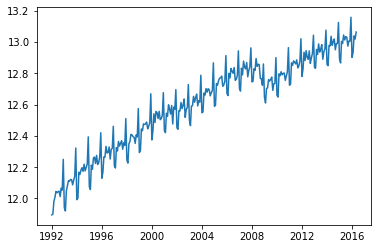

In [107]:
plt.plot(Ser)

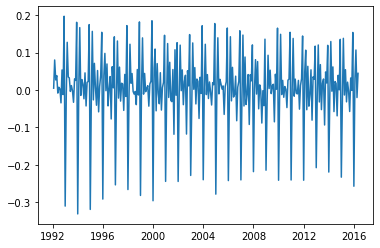

In [110]:
plt.plot(Ser.diff())

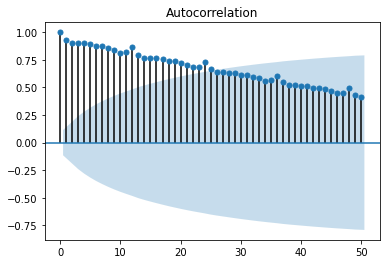

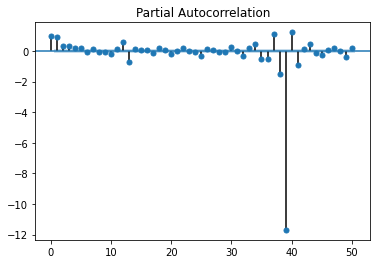

In [111]:
# Realizamos las graficas de Correlaciones
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Modelo MA orden 1
plot_acf(Ser, lags=50)
plot_pacf(Ser, lags=50);

In [112]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(Ser, order=(6,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary());

C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  292
Model:                 ARIMA(6, 1, 0)   Log Likelihood                 359.183
Method:                       css-mle   S.D. of innovations              0.070
Date:                Sat, 20 Jun 2020   AIC                           -702.365
Time:                        21:20:41   BIC                           -672.951
Sample:                    02-01-1992   HQIC                          -690.583
                         - 05-01-2016            

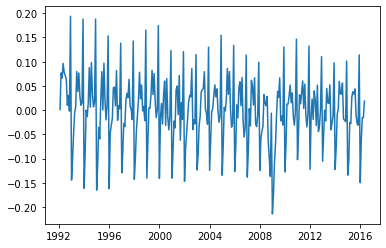

In [116]:
import matplotlib.pyplot as plt

residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)

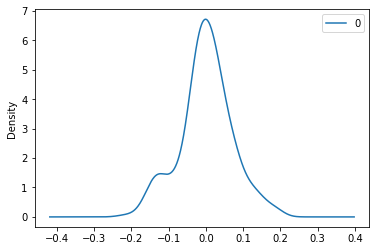

0
count  292.000000
mean     0.000755
std      0.070759
min     -0.214360
25%     -0.032007
50%      0.002609
75%      0.038949
max      0.193841


In [118]:
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [120]:
X = Ser.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(6,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast() #pronostica un solo dato
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=12.817107, expected=12.748214
predicted=12.880519, expected=12.829127
predicted=12.860539, expected=12.818343
predicted=12.869983, expected=12.894129
predicted=12.841048, expected=12.843945
predicted=12.848910, expected=12.857580
predicted=12.824387, expected=12.855404
predicted=12.834799, expected=12.767287
predicted=12.869849, expected=12.765357
predicted=12.870916, expected=12.723589
predicted=12.873550, expected=12.859142
predicted=12.866547, expected=12.645195
predicted=12.793382, expected=12.609830
predicted=12.809131, expected=12.702499
predicted=12.772813, expected=12.706442
predicted=12.763435, expected=12.759291
predicted=12.714083, expected=12.749672
predicted=12.732179, expected=12.760262
predicted=12.712448, expected=12.775562
predicted=12.719291, expected=12.690682
predicted=12.744614, expected=12.732663
predicted=12.764441, expected=12.734893
predicted=12.766525, expected=12.899880
predicted=12.790845, expected=12.659184
predicted=12.724101, expected=12.647619


# Modelado con Propthet

In [15]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [16]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = m.make_future_dataframe(periods=12 * 6, freq='M')
future.tail()

,ds
360,2021-12-31
361,2022-01-31
362,2022-02-28
363,2022-03-31
364,2022-04-30


In [19]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
360,2021-12-31,13.119423,12.750781,13.485789
361,2022-01-31,13.151778,12.781405,13.530828
362,2022-02-28,13.239790,12.855673,13.620580
363,2022-03-31,13.230343,12.839065,13.625516
364,2022-04-30,13.282491,12.875529,13.691037


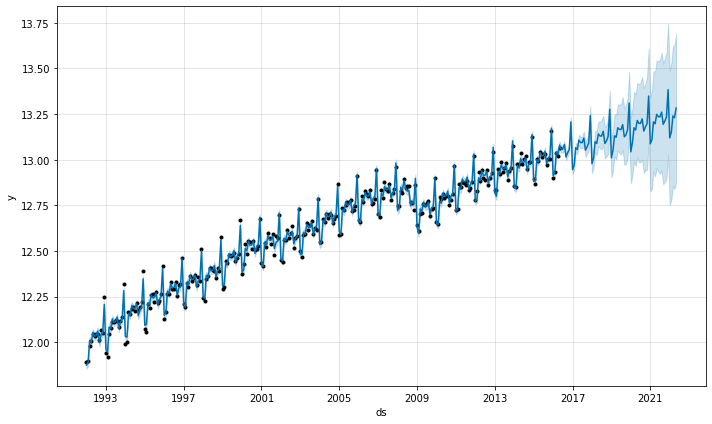

In [20]:
fig1 = m.plot(forecast)

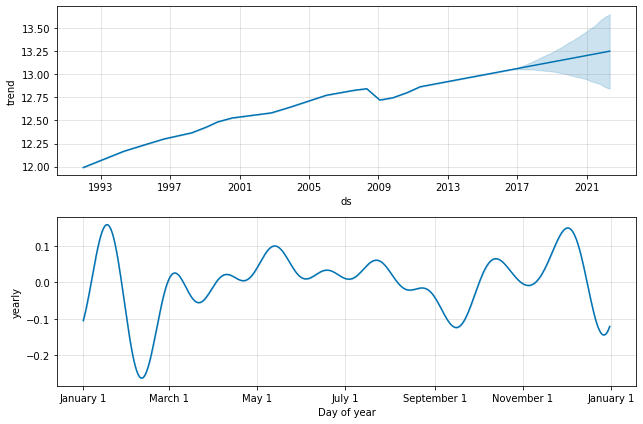

In [21]:
m.plot_components(forecast);

In [23]:
forecast.yhat

0      11.874750
1      11.890914
2      12.011007
3      11.999265
4      12.054946
5      12.033337
6      12.037582
7      12.061561
8      11.997971
9      12.040312
10     12.048231
11     12.207603
12     11.960518
13     11.946611
14     12.084220
15     12.073121
16     12.128673
17     12.109301
18     12.113334
19     12.138394
20     12.074891
21     12.113032
22     12.124208
23     12.282642
24     12.032389
25     12.028580
26     12.157287
27     12.146951
28     12.202412
29     12.183915
         ...    
335    13.310817
336    13.043343
337    13.094834
338    13.174756
339    13.162912
340    13.215001
341    13.199100
342    13.199073
343    13.223736
344    13.156933
345    13.179293
346    13.197167
347    13.348713
348    13.087028
349    13.109637
350    13.207338
351    13.196630
352    13.248731
353    13.235168
354    13.234839
355    13.260423
356    13.193604
357    13.211849
358    13.233190
359    13.383288
360    13.119423
361    13.151778
362    13.2397

In [81]:
m=Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=prediction_size, freq="D")
forecast = m.predict(future)
forecast.head();

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


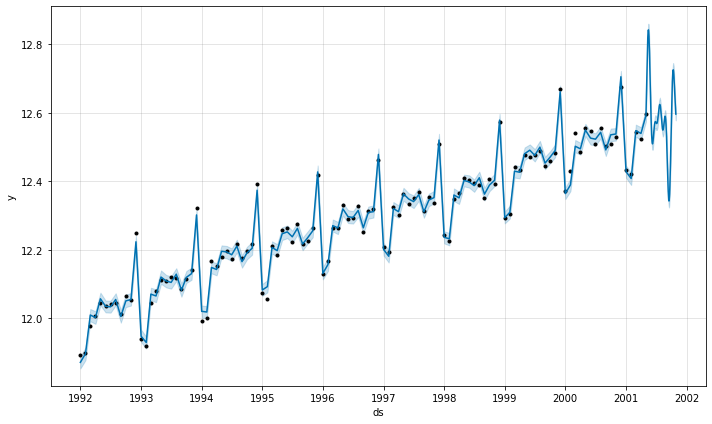

In [82]:
fig2 = m.plot(forecast)

In [83]:
df.tail()

,ds,y
288,2016-01-01,12.901537
289,2016-02-01,12.932543
290,2016-03-01,13.039184
291,2016-04-01,13.019078
292,2016-05-01,13.063507
